In [1]:
# setup
import numpy as np
import os
IMAGE_PATH=A:\4th sem\prml\mnist\Images

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


def plot_digits(instances, images_per_row=10, **options):  #this 10 value gets overriden by value passed when the function is called
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

SyntaxError: invalid syntax (207855354.py, line 4)

In [2]:
# Dataset loaded by scikit-learn
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()                                        

# DESCR key is describing the dataset
# A data  key containing an array with one row per instance and 1 coloumn for a feature 
# A target key containing an array with labels


c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.keys()
X,y=mnist["data"],mnist["target"]
X.shape


(70000, 784)

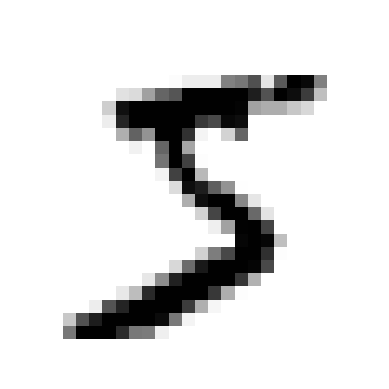

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# when it is a pandas dataframe
# some_digit=X.iloc[[5]]
# some_digit_values=some_digit.values
# some_digit_image=some_digit_values.reshape(28,28)

some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)


plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()


In [6]:
import numpy as np
y[0]
y=y.astype(np.uint8)
type(y)

numpy.ndarray

In [7]:
# seperating the test and training set

X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
# making a new classifier where we can detect whether it is 5 or not
y_train_5=(y_train==5) #y_train_5 becomes like y_train
y_test_5=(y_test==5)   #y_test_5 becomes like y_test

In [14]:
# training using the training dataset
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
# sgd_clf.fit(X_train,y_train_5) 

In [ ]:
# making prediction for some sample 
sgd_clf.predict([some_digit])


array([ True])

In [ ]:
# self made cross_validation and the following code does the same thing that cross_val_score() does

from sklearn.model_selection import StratifiedKFold  #Provides train/test'(generated from the complete training data) indices to split data in train/test sets in a stratified form.
# This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.    
from sklearn.base import clone
# clone is used to create a new copy of the sgd_clf. Then, both the original and cloned estimators are used separately in cross-validation.
#  This helps to ensure that the cross-validation process is done independently for each estimator, avoiding any interference or sharing of states between the two models.

skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds) #training on the train dataset
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds) #compairing with the actual value
    print(n_correct/len(y_pred))




0.9669
0.91625
0.96785


In [ ]:
# now using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# This custom classifier is a simple model that always give the output of the   input data does not represent the number 5.

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [ ]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

# will give accuracy above 90 percent as only 10% of the image are 5 and rest are other numbers
# thus accuracy is not the preffered performance measure for classifiers especially when you are dealing with skewed dataset

array([0.91125, 0.90855, 0.90915])

In [ ]:
# best way is to check the confusion matrix
from sklearn.model_selection import cross_val_predict
# cross_val_predict helps in this process by generating predictions for each data point while training the model on a subset of the data, 
# then validating it on the remaining data.
# cross_val_predict aggregates these predictions from all the folds to provide an overall prediction for each data point in the dataset.(most imp)

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)


<h2>Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred) #rows are actual data and columns are predicted data
# here y_train_5 is the actual data and y_train_pred is the predicted value

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
y_train_perfect_predictions=y_train_5 #pretend we reach perfect prediction
confusion_matrix(y_train_5,y_train_perfect_predictions)

# observe here that images that contain 5 are just 10% of the total

array([[54579,     0],
       [    0,  5421]], dtype=int64)

<h3>Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred)   

0.6511713705958311

In [29]:
# Compute F1 score
from sklearn.metrics import f1_score
# f1_score(y_train_5,y_train_pred)

In [ ]:
# less precision and less recall matlab fn and fp both increases
# less precision and high recall matlab fp inc and fn dec (positive is theif and negative is no one there in detecting person stealing something)
# the tradeoff between precision and recall
y_scores=sgd_clf.decision_function([some_digit])
y_scores #it is predicting it to be true
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred
# raising the threshold decreases the recall
# the classifier missies it when the threshold is increased to 8000 
# how do you decide which threshold to use


array([False])

In [ ]:
# now doing the same when finding y_scores as above for the whole data 
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function") 
# when method is set to decision_function yu are asking the decision_function values for each data point based on their prediction
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

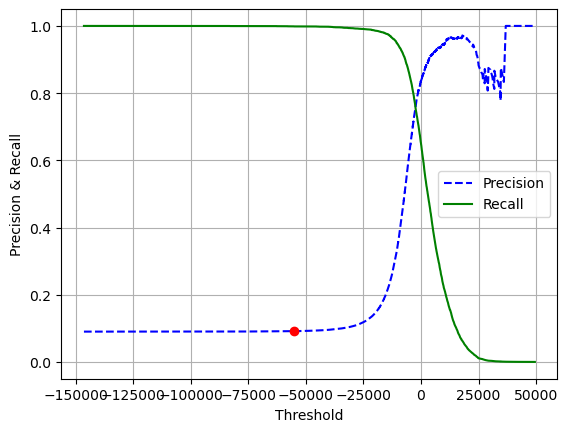

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    threshold_idx = 1000  # You can change this to the index of the threshold you want to highlight
    plt.plot(thresholds[threshold_idx], precisions[threshold_idx], 'ro')  # Highlighting point
    
    plt.xlabel('Threshold')
    plt.ylabel('Precision & Recall')
    plt.legend(loc='best')
    plt.grid(True)

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

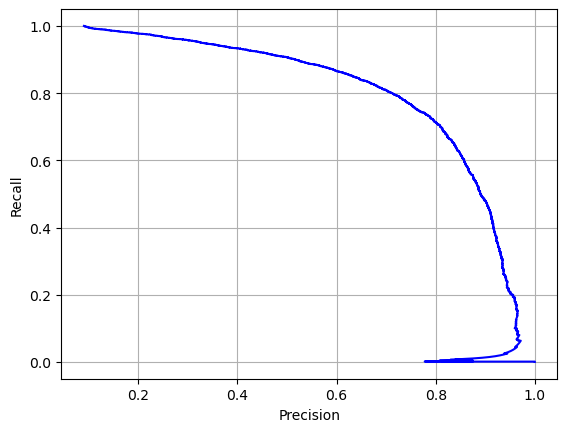

In [ ]:
def precisions_vs_recall(precisions,recalls):
    plt.plot(precisions,recalls,'b-')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)

precisions_vs_recall(precisions,recalls)
plt.show()

In [ ]:
# to get the first index of maximum_value

threshold_90_precision=thresholds[np.argmax(precisions>=0.90)] #to get that threshold that gives precision of greater or equal 90
# threshold_90_precision
y_train_pred_90=(y_scores>=threshold_90_precision) #will give true and false value based on the threshold and sccores

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

<h3>ROC

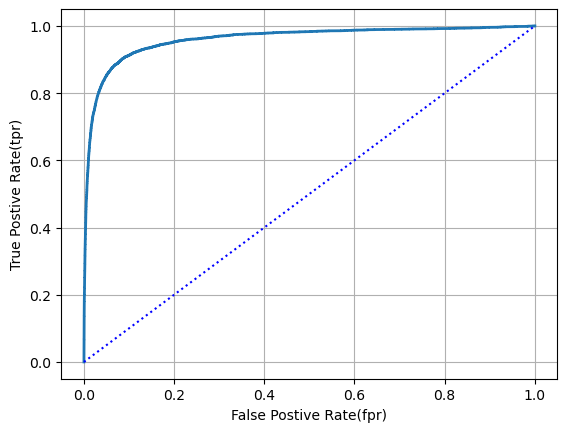

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'b:')
    plt.xlabel('False Postive Rate(fpr)')
    plt.ylabel('True Postive Rate(tpr)')
    # plt.legend(loc="lower right")
    plt.grid(True)

plot_roc_curve(fpr,tpr)
plt.show()
    

In [ ]:
# AUC for roc(close to 1 means perfect classifier and random classifier is close to 0.5)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [ ]:
# Using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")
# this give output for each data point as [0.3,0.7] where 0.3 prob of being postive class and vice versa

In [ ]:
# y_probas_forest
y_scores_forest=y_probas_forest[:,1]  #score=probablity of positive class
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)


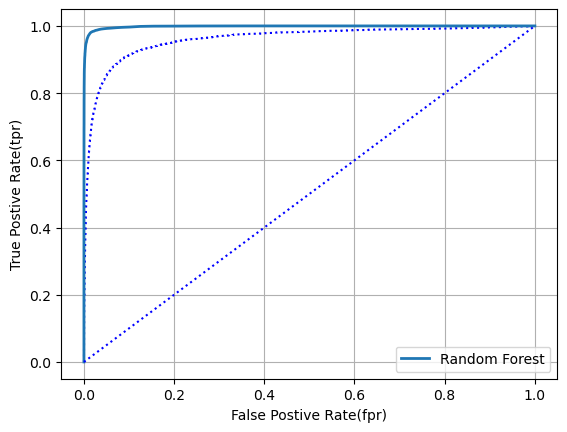

In [ ]:
def plot_roc_curve_forest(fpr,tpr,label="SGD"):
    plt.plot(fpr,tpr,"b:")
    plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
    plt.legend(loc="lower right")
plot_roc_curve_forest(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)



0.9983436731328145

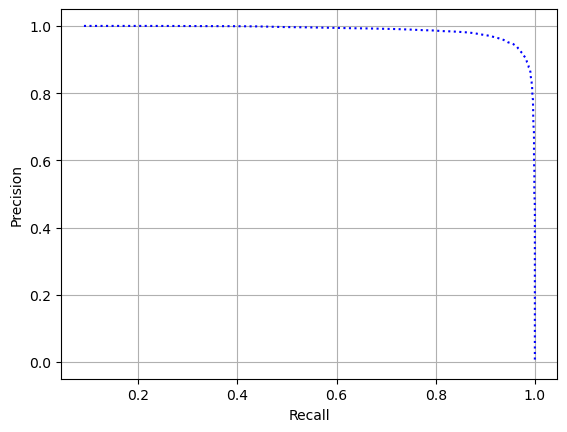

In [ ]:
# this gives roc score better
# finding the precision and recall scores

precisions_f,recalls,thresholds=precision_recall_curve(y_train_5,y_scores_forest)

def precisions_vs_recalls_f(precisions,recalls):
    plt.plot(precisions,recalls,'b:')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
precisions_vs_recalls_f(precisions_f,recalls)
plt.show()

In [ ]:
threshold_90_precision=thresholds[np.argmax(precisions_f>=0.90)]
y_train_predi_90=(y_scores>=threshold_90_precision)
precision_score(y_train_5,y_train_predi_90)
recall_score(y_train_5,y_train_predi_90)            

0.6511713705958311

<h2>Multiclass Classification

In [10]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train) #y_train not y_train_5 as doing multiclass
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [11]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [12]:
import numpy as np
np.argmax(some_digit_scores)
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
# Training on the sgdClassifier
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])


array([3], dtype=uint8)

In [16]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [18]:
# scaling the input
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")                                    

array([0.8983, 0.891 , 0.9018])

<h2>Error Analysis

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx


array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

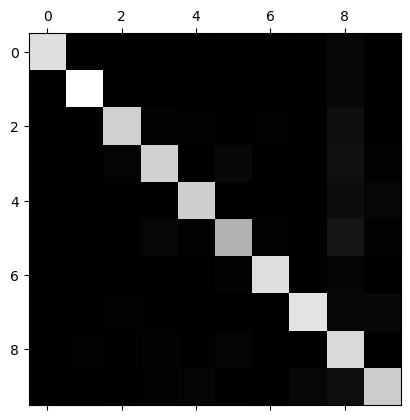

In [20]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

# more dark lower the number of instances

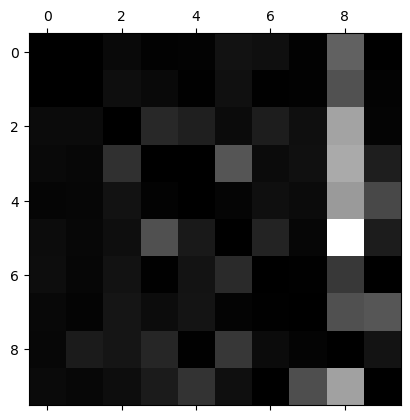

In [23]:
# compairing error rates rather than absolute number of error
row_sum=conf_mx.sum(axis=1,keepdims=True)
norms_conf_mx=conf_mx/row_sum
# filling the diagonal with zeros to keep only the error 
np.fill_diagonal(norms_conf_mx,0)
plt.matshow(norms_conf_mx,cmap=plt.cm.gray)
plt.show()


In [21]:
# Analyzing individual errors

cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

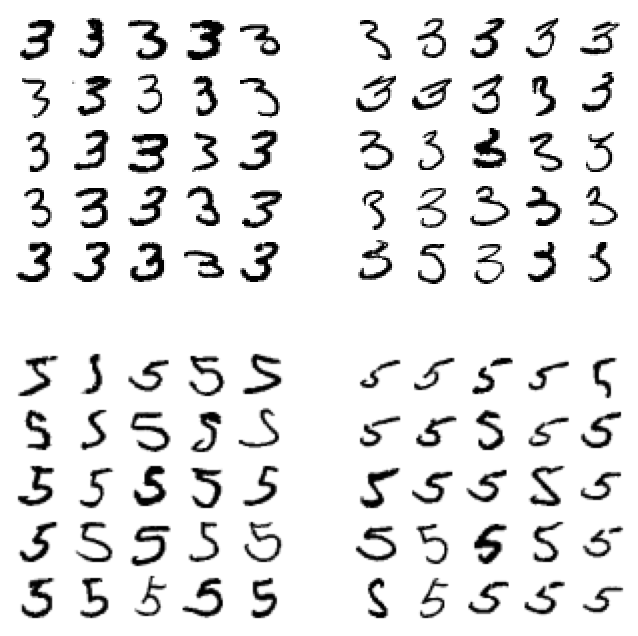

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)

plt.show()
        

<h2>Multilabel Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier


#two target label
y_train_large=(y_train>=7)  #for checking whether it is greater than 7
y_train_odd=(y_train%2==1)  #for checking whether it is odd
y_multilabel=np.c_[y_train_large,y_train_odd] 

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])



array([[False,  True]])

In [30]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")  #use average="weighted" to given average



0.976410265560605

<h2>Multioutput classification

In [31]:

noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

NameError: name 'IMAGES_PATH' is not defined

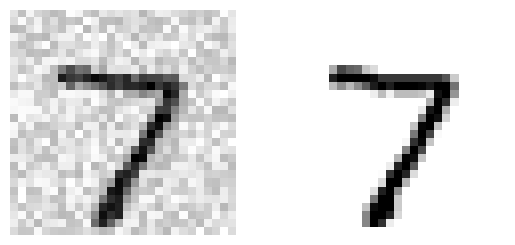

In [34]:
some_index=0
plt.subplot(121);plot_digit(X_test_mod[some_index])
plt.subplot(122);plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
# testing on a number
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_digit]])
plot_digits(clean_digit)
save_fig("cleaned_digit_example_plot")


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
_